In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


In [4]:
x = data[:,0]
y = data[:,1]

In [6]:
# Eliminating the null values in Y column
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

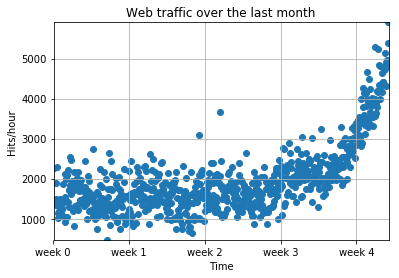

In [7]:
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [8]:
# Desired order of the polynomial (straight line has order 1)
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [9]:
print("Model parameters: %s" % fp1)

Model parameters: [   2.59619213  989.02487106]


In [11]:
# Error calculation - square of distance of 
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

In [12]:
f1 = sp.poly1d(fp1)
print(error(f1,x,y))

317389767.34


In [20]:
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

In [28]:
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)
    plt.show()

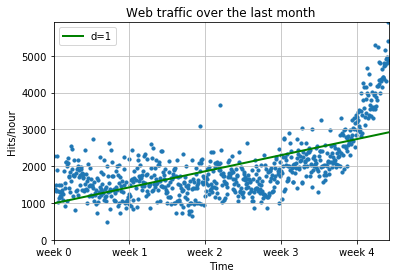

In [29]:
plot_models(x, y, [f1], "f1.png")

In [30]:
#Polynomial degree of 2
fp2 = sp.polyfit(x, y, 2)
print(fp2)
f2 = sp.poly1d(fp2)
print(error(f2, x, y))
plot_models(x, y, [f2], "f2.png")

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
179983507.878


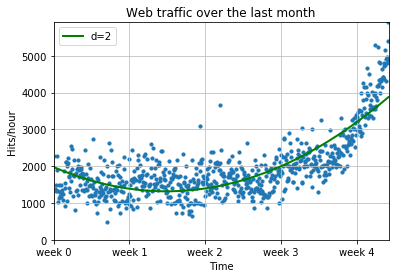

[  3.04960132e-05  -2.35893797e-02   4.94226019e+00   1.33328797e+03]
139350144.032


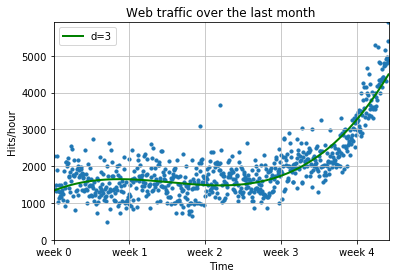

In [32]:
#Polynomial degree of 3
fp3 = sp.polyfit(x, y, 3)
print(fp3)
f3 = sp.poly1d(fp3)
print(error(f3, x, y))
plot_models(x, y, [f3], "f3.png")

[ -3.73981969e-22   1.36473757e-18  -2.14294406e-15   1.89884971e-12
  -1.04570108e-09   3.70867731e-07  -8.45604588e-05   1.19167041e-02
  -9.41618607e-01   3.33703840e+01   1.26421204e+03]
121942326.364


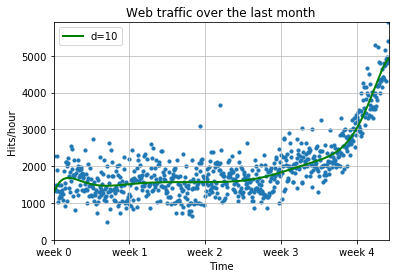

In [33]:
#Polynomial degree of 10
fp10 = sp.polyfit(x, y, 10)
print(fp10)
f10 = sp.poly1d(fp10)
print(error(f10, x, y))
plot_models(x, y, [f10], "f10.png")

C:\Users\prasas3\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\prasas3\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000  -0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000  -0.00000000e+000
   0.00000000e+000  -0.00000000e+000   0.00000000e+000  -0.00000000e+000
   0.00000000e+000   0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000  -6.72772276e-140
   1.19708800e-136  -4.65668728e-135  -4.66517904e-131  -2.54266968e-128
   2.26011967e-126   1.39024436e-122   1.16111651e-

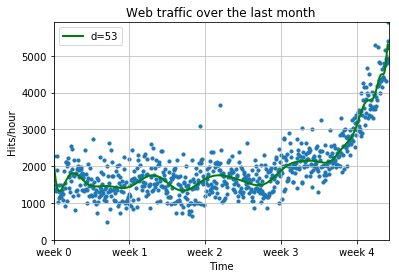

In [34]:
#Polynomial degree of 100
fp100 = sp.polyfit(x, y, 100)
print(fp100)
f100 = sp.poly1d(fp100)
print(error(f100, x, y))
plot_models(x, y, [f100], "f100.png")

In [36]:
inflection = 3.5*7*24 # calculate the inflection point in hours

In [38]:
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]

C:\Users\prasas3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
C:\Users\prasas3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [39]:
xb = x[inflection:] # data after
yb = y[inflection:]

C:\Users\prasas3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
C:\Users\prasas3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [45]:
fa1 = sp.poly1d(sp.polyfit(xa, ya, 1))
fb1 = sp.poly1d(sp.polyfit(xb, yb, 1))

In [46]:
fa1_error = error(fa1, xa, ya)
fb1_error = error(fb1, xb, yb)
print("Error inflection=%f" % (fa1_error + fb1_error))

Error inflection=132950348.197616


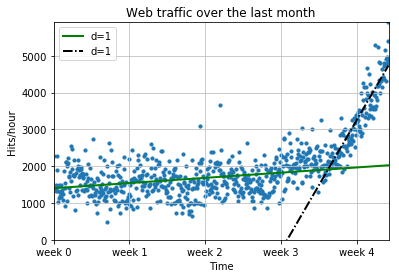

In [47]:
plot_models(x, y, [fa1, fb1], "inflection1.png")

Error inflection=122584668.146112


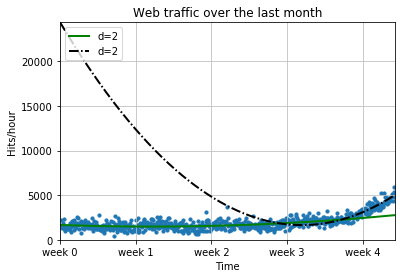

In [48]:
fa2 = sp.poly1d(sp.polyfit(xa, ya, 2))
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fa2_error = error(fa2, xa, ya)
fb2_error = error(fb2, xb, yb)
print("Error inflection=%f" % (fa2_error + fb2_error))
plot_models(x, y, [fa2, fb2], "inflection2.png")

[  1.14980043e-05  -5.91528556e-03   6.78431240e-01   1.54058906e+03]
[  6.72555446e-05  -5.62551942e-02   5.66378462e+00   4.28706337e+03]
          3            2
1.15e-05 x - 0.005915 x + 0.6784 x + 1541
           3           2
6.726e-05 x - 0.05626 x + 5.664 x + 4287
Error inflection=121352906.776585


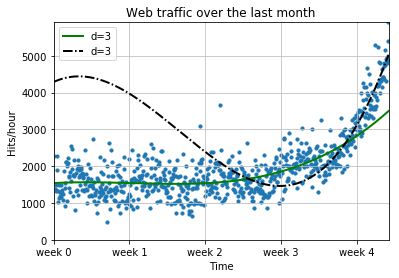

In [53]:
fa13=sp.polyfit(xa, ya, 3)
fb13=sp.polyfit(xb, yb, 3)
fa3 = sp.poly1d(fa13)
fb3 = sp.poly1d(fb13)
print(fa13)
print(fb13)
print(fa3)
print(fb3)
fa3_error = error(fa3, xa, ya)
fb3_error = error(fb3, xb, yb)
print("Error inflection=%f" % (fa3_error + fb3_error))
plot_models(x, y, [fa3, fb3], "inflection3.png")